# A Simple Linear Regression

### Importing the Usual Suspects


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Data

In [2]:
df = pd.read_csv("insurance.csv")

df.head(9)

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070


### Plotting the Data

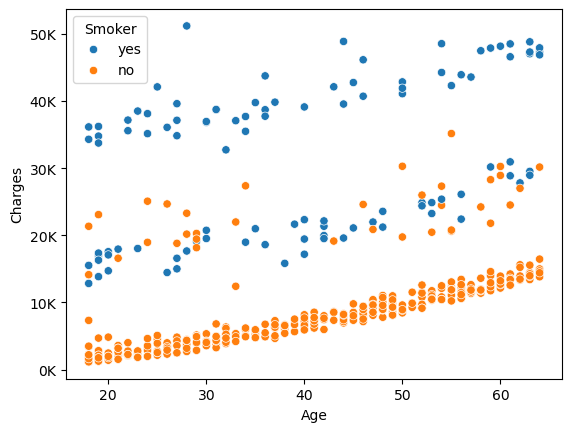

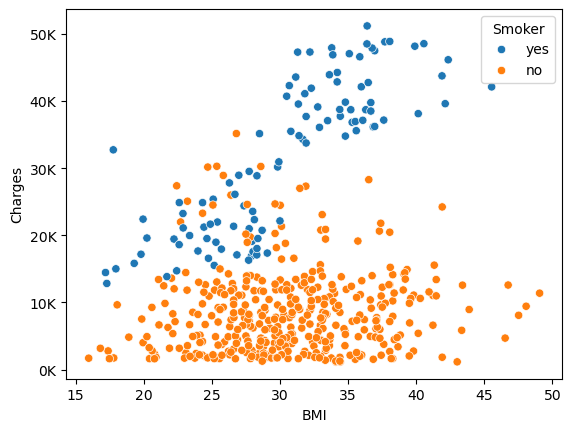

In [3]:
from matplotlib.ticker import FuncFormatter

ax = sns.scatterplot(data=df, x='Age', y='Charges', hue='Smoker')

ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: f'{x/1_000:.0f}K')
)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

ax = sns.scatterplot(data=df, x='BMI', y='Charges', hue='Smoker')

ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: f'{x/1_000:.0f}K')
)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

### Changing Smoker value to machine readable


In [4]:
df["Smoke Code"] = df["Smoker"].apply(lambda x: 1 if x == "yes" else 0)

### Train/Test Split

In [5]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df[["Age", "BMI", "Smoke Code"]], df["Charges"], test_size=0.2, random_state=42)

### Fitting the model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
train_x_poly = poly.fit_transform(train_x)

model = LinearRegression()
model.fit(train_x_poly, train_y)

print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [ 1.60515547e+01  9.72168626e+01 -1.03416962e+04  2.44138263e+00
  2.14426409e+00 -2.63557103e+01 -3.80430852e+00  1.49125911e+03
 -1.03416962e+04]
Intercept:  1808.8921735001077


### Measuring Metrics

In [7]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)

test_y_pred = model.predict(test_x_poly)

r2 = round(r2_score(test_y, test_y_pred), 2)
print("R2-score: ", r2)

R2-score:  0.89


### Plot predicted vs. actual

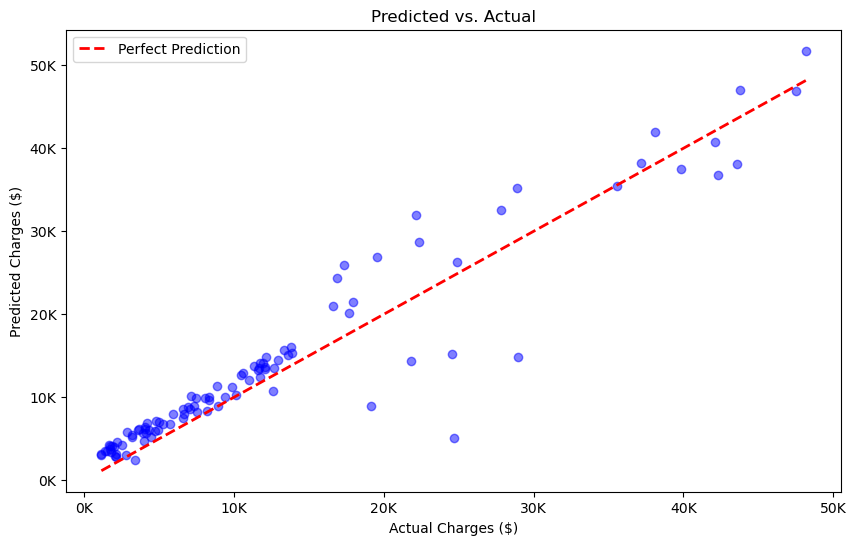

In [8]:
fig, ax = plt.subplots()

fig.set(figheight=6, figwidth=10)

ax.scatter(test_y, test_y_pred, alpha=0.5, color='blue')

ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 
         '--r', linewidth=2, label='Perfect Prediction')

ax.xaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: f'{x/1_000:.0f}K')
)
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: f'{x/1_000:.0f}K')
)

ax.set_xlabel("Actual Charges ($)")
ax.set_ylabel("Predicted Charges ($)")
ax.set_title("Predicted vs. Actual")
ax.legend()
plt.show()